# Домашняя работа №5
# Студент: Правилов Михаил

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

# Задание 1

Есть краевая задача:

$-u''(x) + u(x) = x$ при $u(0) = u(1) = 0$ и $x \in [0; 1]$.

"Найдите его аналитическое решение и используйте для проверки."

Это обычное неоднородное уравнение второго порядка.

Общее решение:

$-t^2 + 1 = 0 \Leftrightarrow t = +-1 \Rightarrow$ общее решение = $C_1 * e^x + C_2 * e^{-x}$

Частное решение угадывается легко: $u(x) = x$

Значит полное решение: $u(x) = C_1 * e^{x} + C_2 * e^{-x} + x$

Учитывая условия краевой задачи получаем систему: $u(0) = C_1 + C_2 = 0, u(1) = C_1 * e + C_2 * \frac{1}{e} + 1 = 0 \Leftrightarrow C_1 = -C_2, -C_2 * e + C_2 * \frac{1}{e} + 1 = 0 \Leftrightarrow C_1 = \frac{e}{1 - e^2}, C_2 = \frac{e}{e^2 - 1}$

Итого ответ: $u(x) = \frac{e}{1 - e^2} * e^{x} + \frac{e}{e^2 - 1} * e^{-x} + x$

In [45]:
def u_real(x):
    e = np.e
    return e / (1 - e ** 2) * (e ** x - e ** (-x)) + x

"Сформируйте матрицы A и b"

In [46]:
def get_h(N):
    return 1 / (N + 1)

def get_A(N):
    h = get_h(N)
    A = np.zeros((N, N))
    i, j = np.indices(A.shape)
    A[i == j + 1] = -h ** (-2)
    A[i == j] = 2 * h ** (-2) + 1
    A[i == j - 1] = -h ** (-2)
    return A

def get_b(N):
    h = get_h(N)
    b = np.array([i * h for i in range(1, N + 1)])
    return b

"Найтие решение $\vec{u}$ с помощью стандартной функции решения СЛАУ. Постройте решение, сравните его с точным"

Давайте построим на график максимальной ошибки в точках $x_i$ в зависимости от N, т.е. $(N, max_{i=0}^{N}|u_{solved}(x_i) - u_{real}(x_i)|)$.

А также для наглядности построим для максимального N с предыдщего графика, график, где нарисуем графики функций u_solved и u_real, построенные в точках $x_i$.

In [221]:
def get_max_error(solved, real):
    return np.max(np.abs(np.array(solved) - np.array(real)))

def draw_max_error(N_min, N_max, solver, log_x=True, log_y=True):
    data_x = []
    data_y = []
    for N in range(N_min, N_max + 1):
        A = get_A(N)
        b = get_b(N)
        solved = solver(A, b)
        h = get_h(N)
        x_is = [i * h for i in range(1, N + 1)]
        real = [u_real(x_i) for x_i in x_is]
        max_error = get_max_error(solved, real)
        data_x.append(np.log10(N) if log_x else N)
        data_y.append(np.log10(max_error) if log_y else max_error)
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel(("log " if log_y else "") + "max |solved(x_i) - real(x_i)|")
    plt.xlabel(("log " if log_y  else "") + "N")

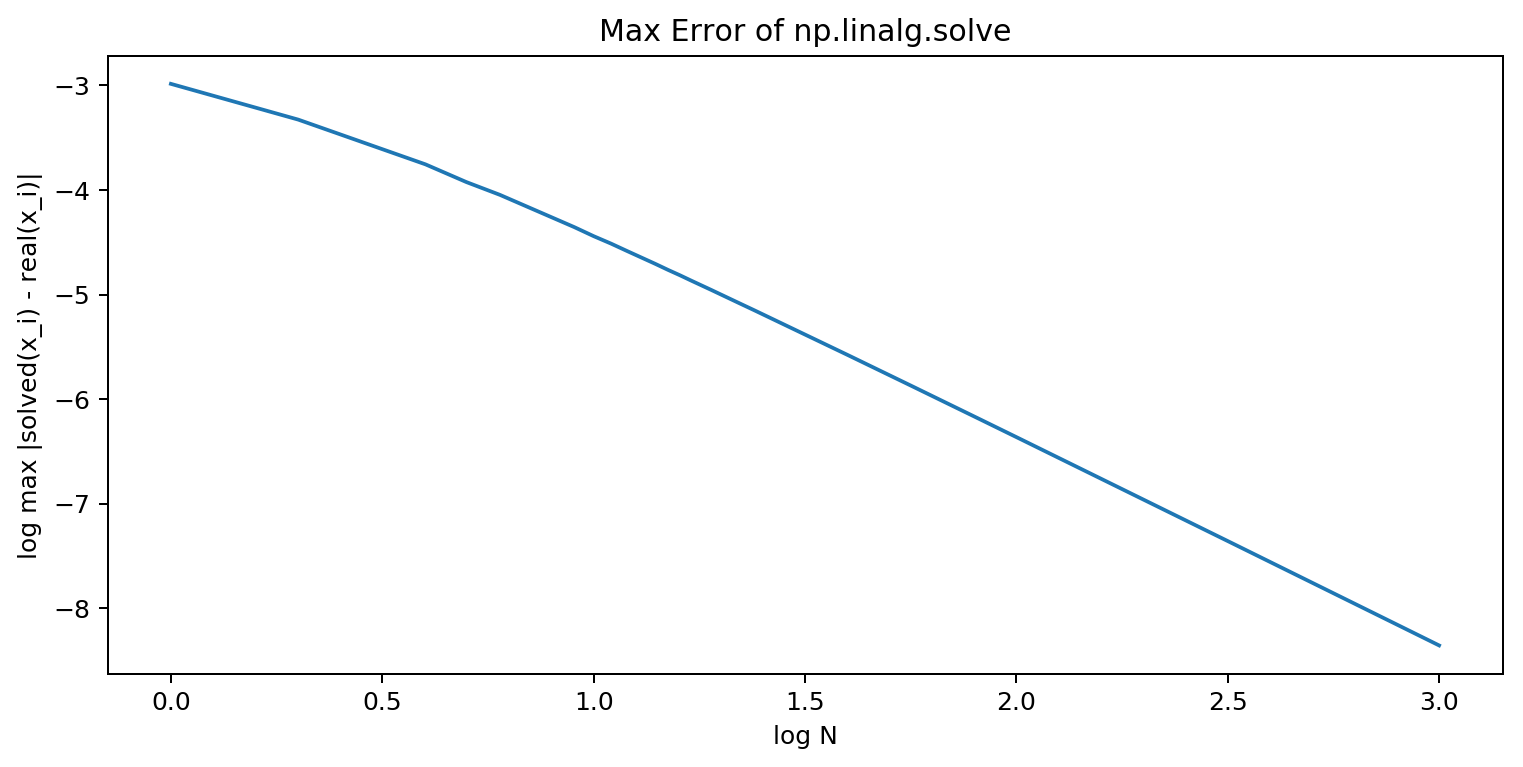

In [104]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_error(1, 1000, np.linalg.solve)
plt.title("Max Error of np.linalg.solve")
plt.show()

Это очень похоже на прямую и так как это в координатах $(log(N); log(err(N))$, то $err(N)$ ведет себя примерно как $\frac{1}{N^{\alpha}}$, где $\alpha > 0$

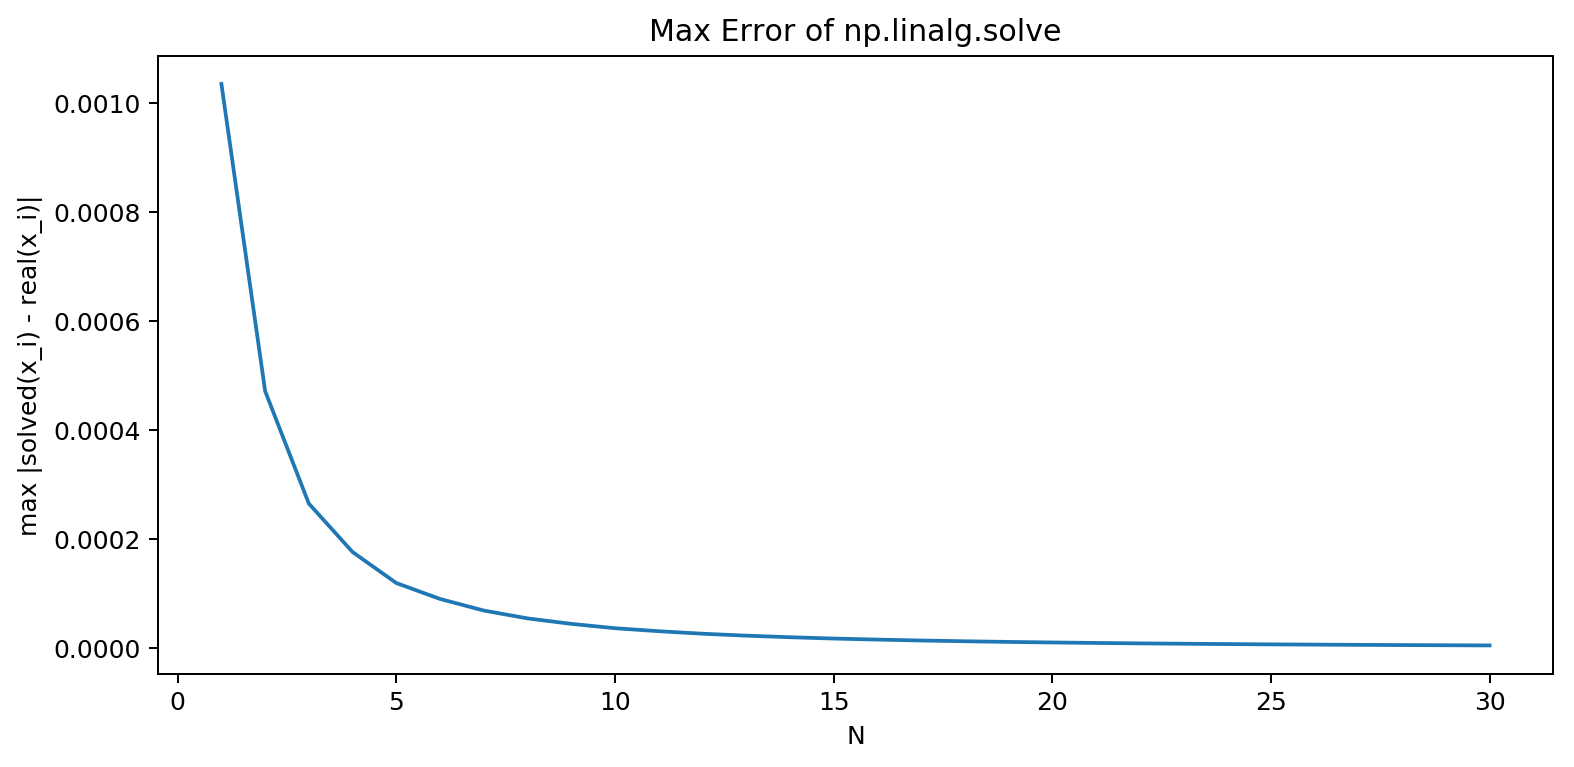

In [106]:
plt.figure(figsize=(10, 10), dpi=180)
draw_max_error(1, 30, np.linalg.solve, False, False)
plt.title("Max Error of np.linalg.solve")
plt.show()

Вообщем-то графики с меньшем N и без логарифмирования это подтверждают, вероятно $\alpha$ близок к $8.5$.

In [107]:
def draw_solved(N, solver):
    A = get_A(N)
    b = get_b(N)
    solved = solver(A, b)
    h = get_h(N)
    data_x = [0] + [i * h for i in range(1, N + 1)] + [1]
    data_y = [0] + solved.tolist() + [0]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("u(x)")
    plt.xlabel("x")

def draw_real(N):
    h = get_h(N)
    data_x = [0] + [i * h for i in range(1, N + 1)] + [1]
    data_y = [u_real(x_i) for x_i in data_x]
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("u(x)")
    plt.xlabel("x")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


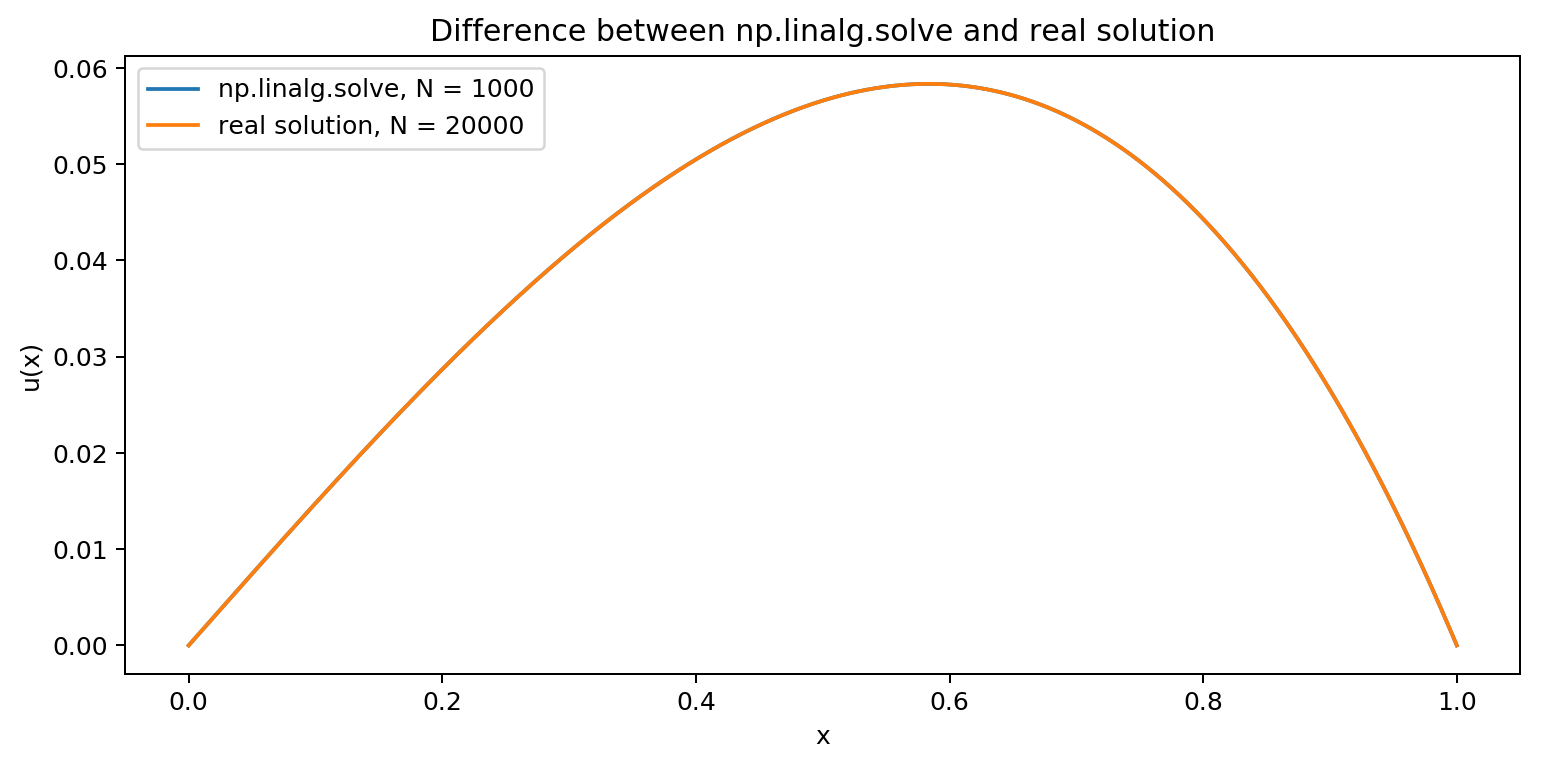

In [108]:
plt.figure(figsize=(10, 10), dpi=180)
draw_solved(1000, np.linalg.solve)
draw_real(20000)
plt.title("Difference between np.linalg.solve and real solution")
plt.legend(("np.linalg.solve, N = 1000", "real solution, N = 20000"))
plt.show()

Как видим при N = 1000 уже достигается хорошая точность, потому что графики совпадают (синего невидно как раз потому что он отрисовывается первым). При этом при N = 1000 все считается довольно быстро. Также для точно решения график строился по 20000 точкам, значит для апроксимации 1000 вполне достаточно. Это все хорошо согласуется с той оценкой погрешности, которую мы увидели на прошлом графике.

"Используя встроенные функции для измерения времени, постройте график зависимости времени решения СЛАУ от ее размерности"

In [147]:
def get_time(solver, A, b, N=1):
    start = time.time()
    for i in range(N):
        solver(A, b)
    end = time.time()
    elapsed = end - start
    return elapsed / N

def draw_timing(N_min, N_max, solver, log_x=True, log_y=True):
    data_x = []
    data_y = []
    for N in range(N_min, N_max + 1):
        A = get_A(N)
        b = get_b(N)
        time = get_time(solver, A, b)
        data_x.append(np.log10(N) if log_x else N)
        data_y.append(np.log10(time) if log_y else time)
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel(("log " if log_y else "") + "time (sec)")
    plt.xlabel(("log " if log_x else "") + "N")

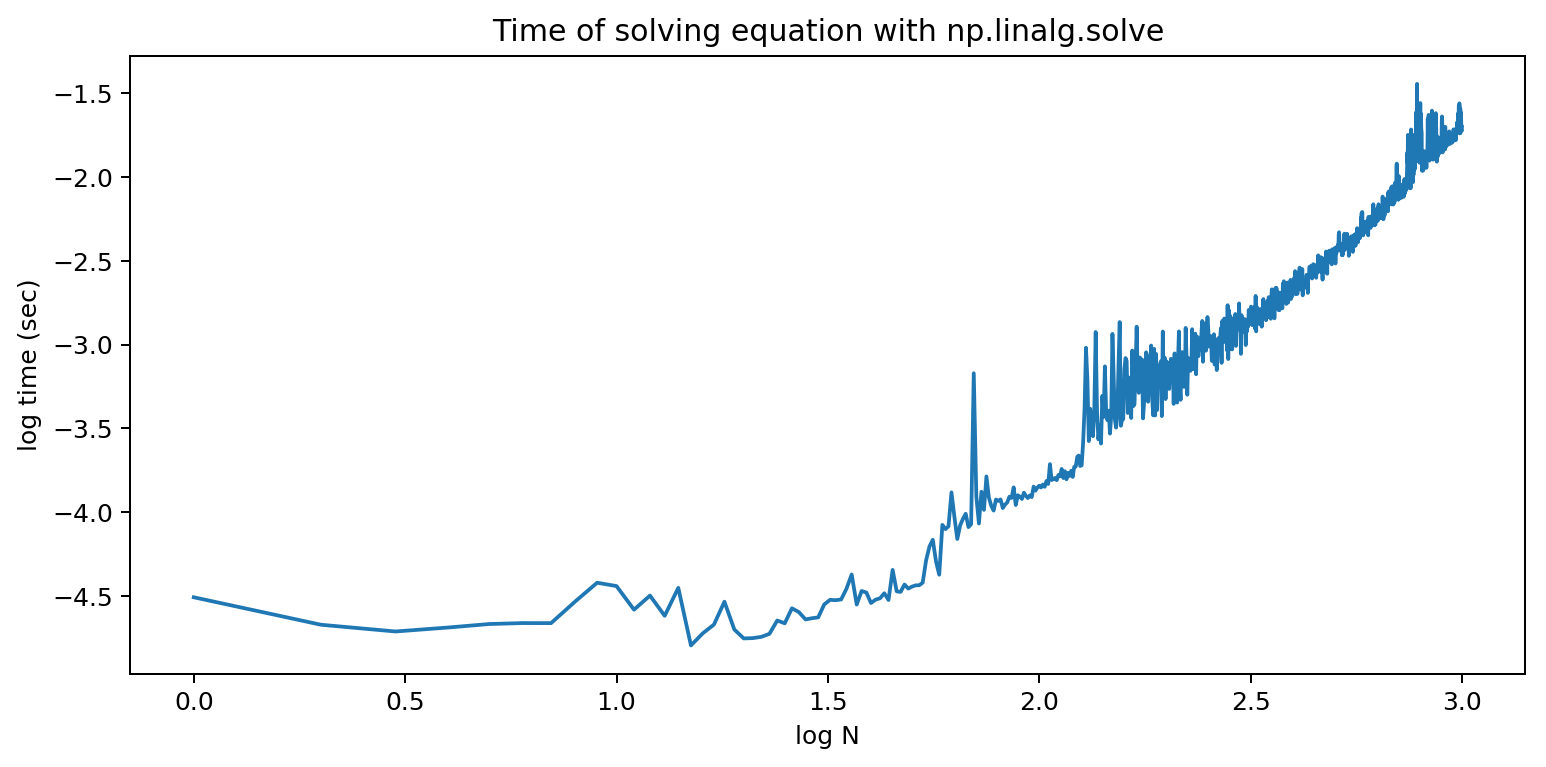

In [125]:
plt.figure(figsize=(10, 10), dpi=180)
draw_timing(1, 1000, np.linalg.solve)
plt.title("Time of solving equation with np.linalg.solve")
plt.show()

"Реализуйте метод прогонки для решения построенной системы"

Соответственно в методе прогонки $a_2,...,a_N = h^{-2}$, $b_1,...,b_{N - 1} = h^{-2}$, $c_1,...,c_N = 2h^{-2} + 1$. 

In [230]:
def tridiagonal_solver(A, s):
    N = len(s)
    a = [0] + [-A[i + 1][i] for i in range(N - 1)]
    c = [A[i][i] for i in range(N)]
    b = [-A[i - 1][i] for i in range(1, N)]
    if N == 1:
        return [s[0] / c[0]]
    alphas = np.zeros(N - 1)
    alphas[0] = b[0] / c[0]
    betas = np.zeros(N)
    betas[0] = s[0] / c[0]
    for k in range(1, N - 1):
        alphas[k] = b[k] / (c[k] - alphas[k - 1] * a[k])
    for k in range(1, N):
        betas[k] = (s[k] + betas[k - 1] * a[k]) / (c[k] - alphas[k - 1] * a[k])
    t = np.empty(N)
    t[N - 1] = betas[N - 1]
    for k in reversed(range(0, N - 1)):
        t[k] = alphas[k] * t[k + 1] + betas[k]
    return t.tolist()

"Постройте график зависимости врмени работы метода прогонки от N, сравните с np.linalg.solve"

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


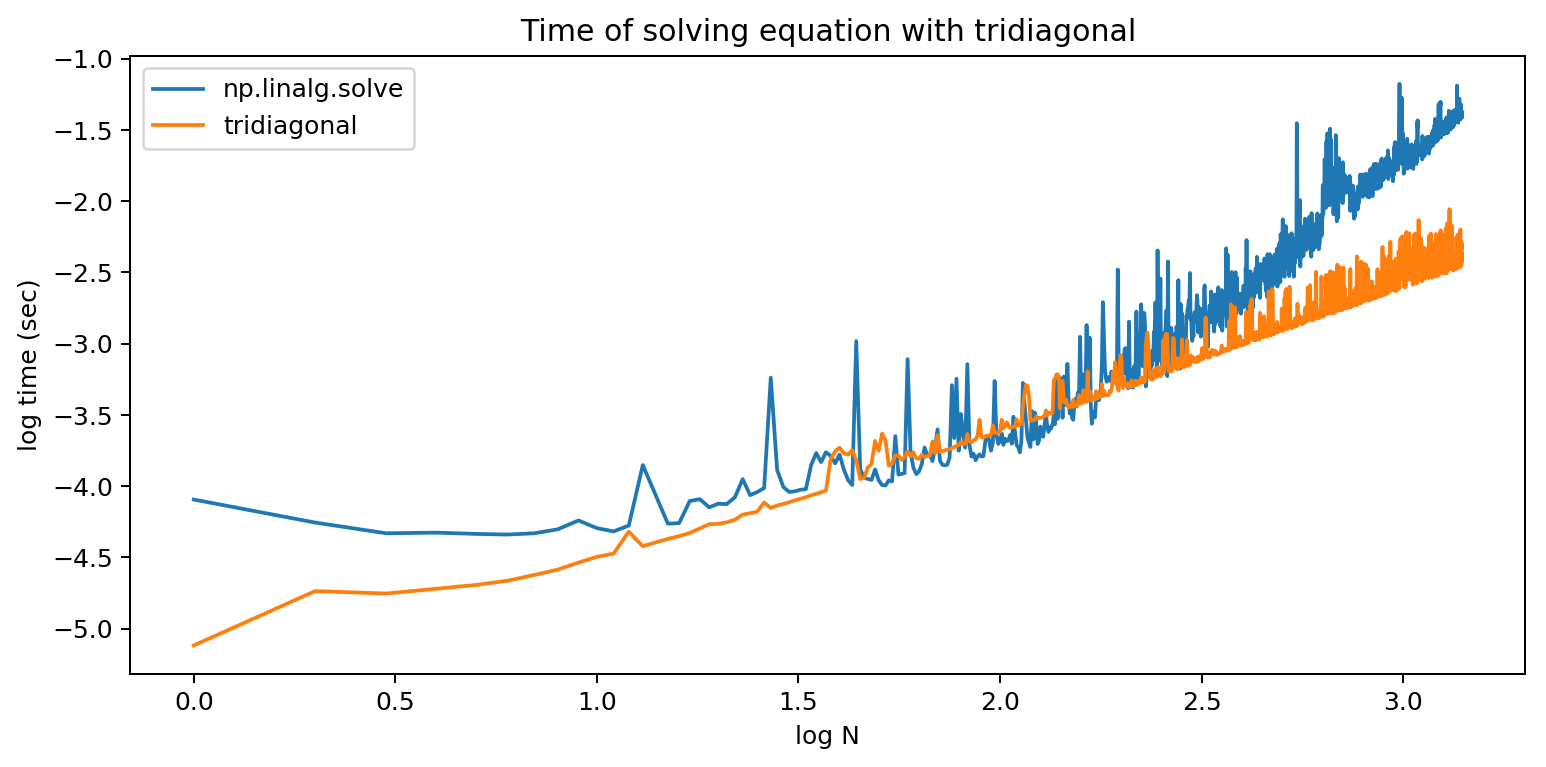

In [234]:
plt.figure(figsize=(10, 10), dpi=180)
draw_timing(1, 1400, np.linalg.solve)
draw_timing(1, 1400, tridiagonal_solver)
plt.legend(("np.linalg.solve", "tridiagonal"))
plt.title("Time of solving equation with tridiagonal")
plt.show()

Вывод: метод прогонки быстрее, чем стандартный np.linalg.solve, что неудивительно, ведь в методе прогонки мы пользуемся тем, что матрица состоит лишь из 3 диагонелей и в итоге он работает за O(N). График метода прогонки действительно выглядит, как прямая с коэффициентом k = 1, что и соответсвует времени работы O(N).
Обычный np.linalg.solve наверное работает чуть меньше чем $O(N^3)$, но точно больше $O(N^2)$, потому что в принципе тоже получилась прямая, но ее угол наклона больше и примерно соответствует 3.

Начало графика можно игнорировать, так как при малых N замеры времени могут быть не самыми точными, показательно то, сколько времени занимает вычисление больших матриц.

## Задание №2

"Реализуйте метод последовательной верхней релаксации"

In [365]:
def SOR_solver(A, b, w, num_iter):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    inverse = np.linalg.inv(D + w * L)
    T_w = inverse @ ((1 - w) * D - w * U)
    x = np.zeros(len(b))
    for k in range(num_iter):
        x = T_w @ x + w * inverse @ b
    return x

def SOR_solver_all_iters(A, b, w, num_iter):
    D = np.diag(np.diag(A))
    L = np.tril(A, -1)
    U = np.triu(A, 1)
    inverse = np.linalg.inv(D + w * L)
    T_w = inverse @ ((1 - w) * D - w * U)
    x = np.zeros(len(b))
    xs = []
    for k in range(num_iter):
        x = T_w @ x + w * inverse @ b
        xs.append(x)
    return xs

"Постройте зависимость погрешности решения от номера итерации для разных N и $\omega = 1, 1.3, 1.6, 1.8, 1.9$"

In [366]:
omegas = [1, 1.3, 1.6, 1.8, 1.9]

In [374]:
def draw_error_from_iter(it_max, solver, N, w, log_x=True, log_y=True):
    data_x = []
    data_y = []
    A = get_A(N)
    b = get_b(N)
    real = solver(A, b)
    SORS = SOR_solver_all_iters(A, b, w, it_max)
    for it_num, SOR in enumerate(SORS, 1):
        max_error = get_max_error(SOR, real)
        data_x.append(np.log10(it_num) if log_x else it_num)
        data_y.append(np.log10(max_error) if log_y else max_error)
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel(("log " if log_y else "") + "max error")
    plt.xlabel(("log " if log_x else "") + "iter_num")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


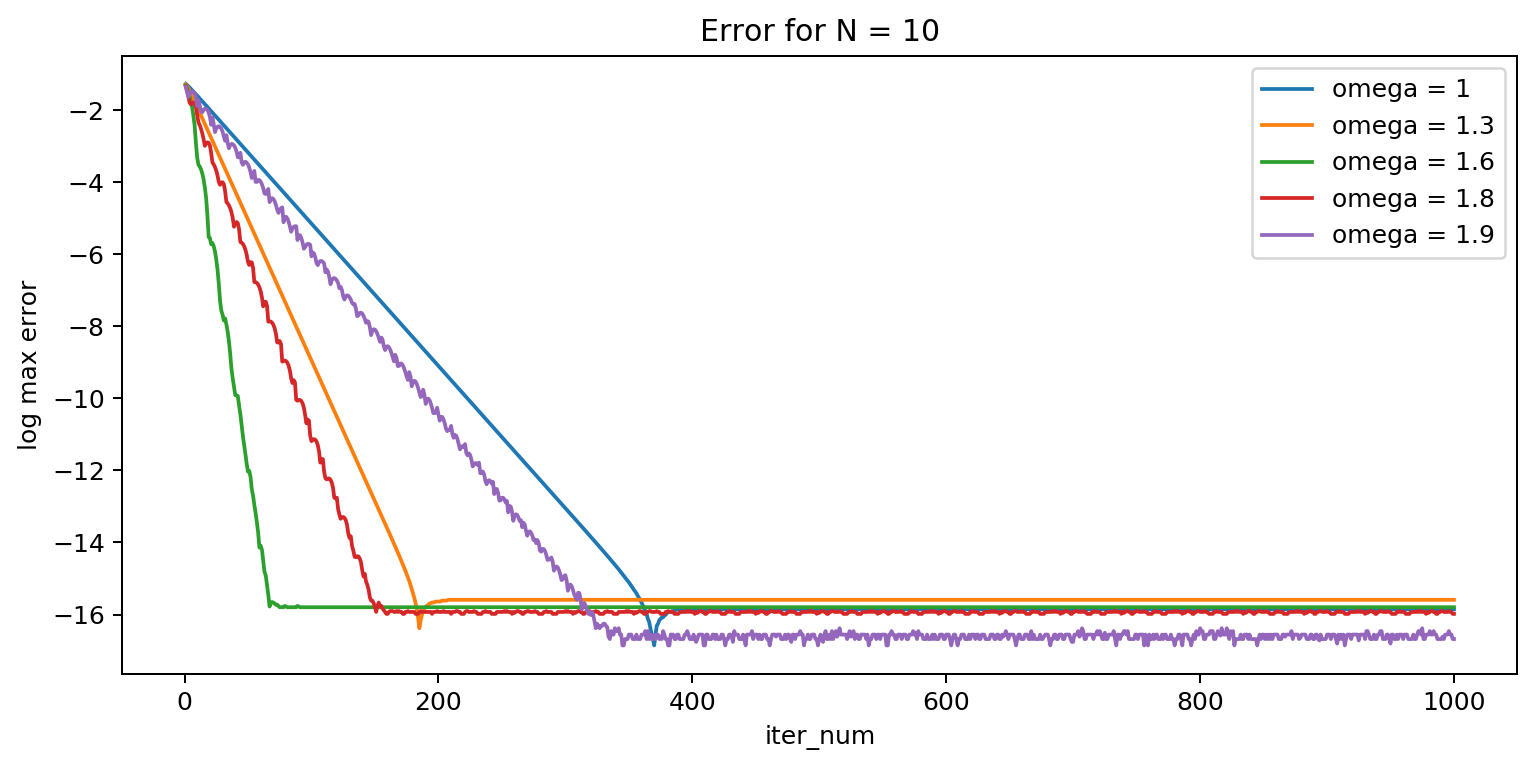

In [375]:
N = 10
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_x=False, log_y=True)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


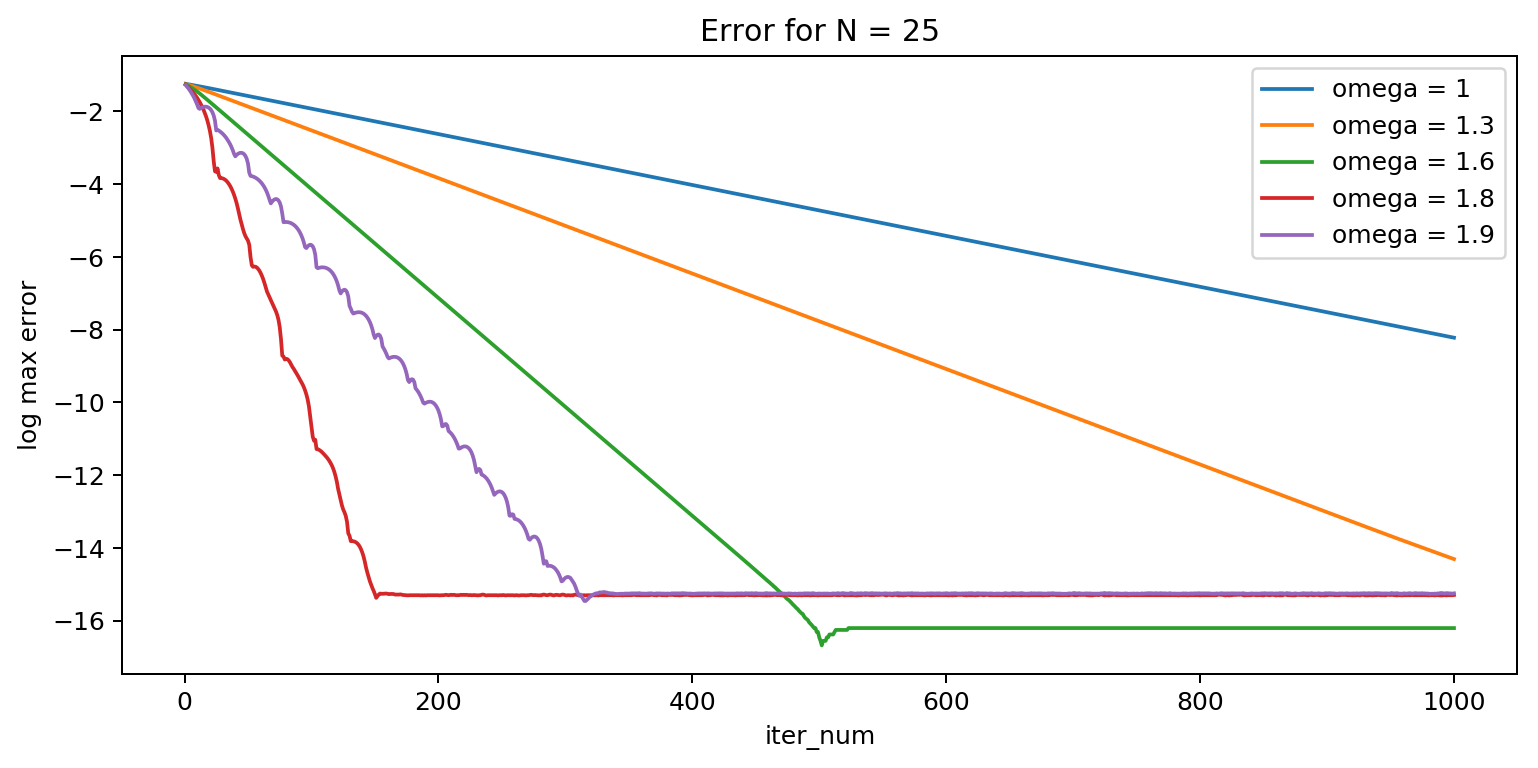

In [376]:
N = 25
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


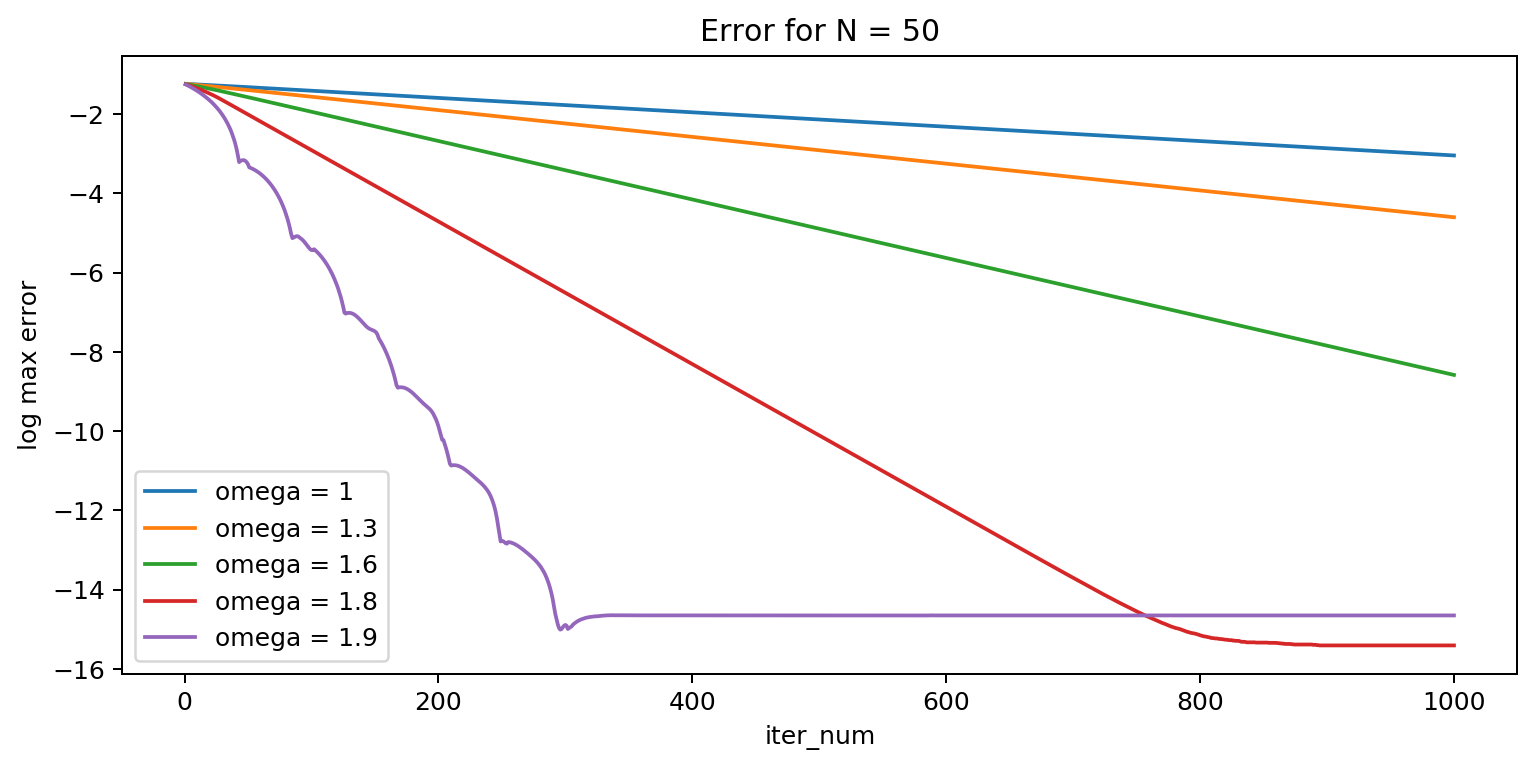

In [377]:
N = 50
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


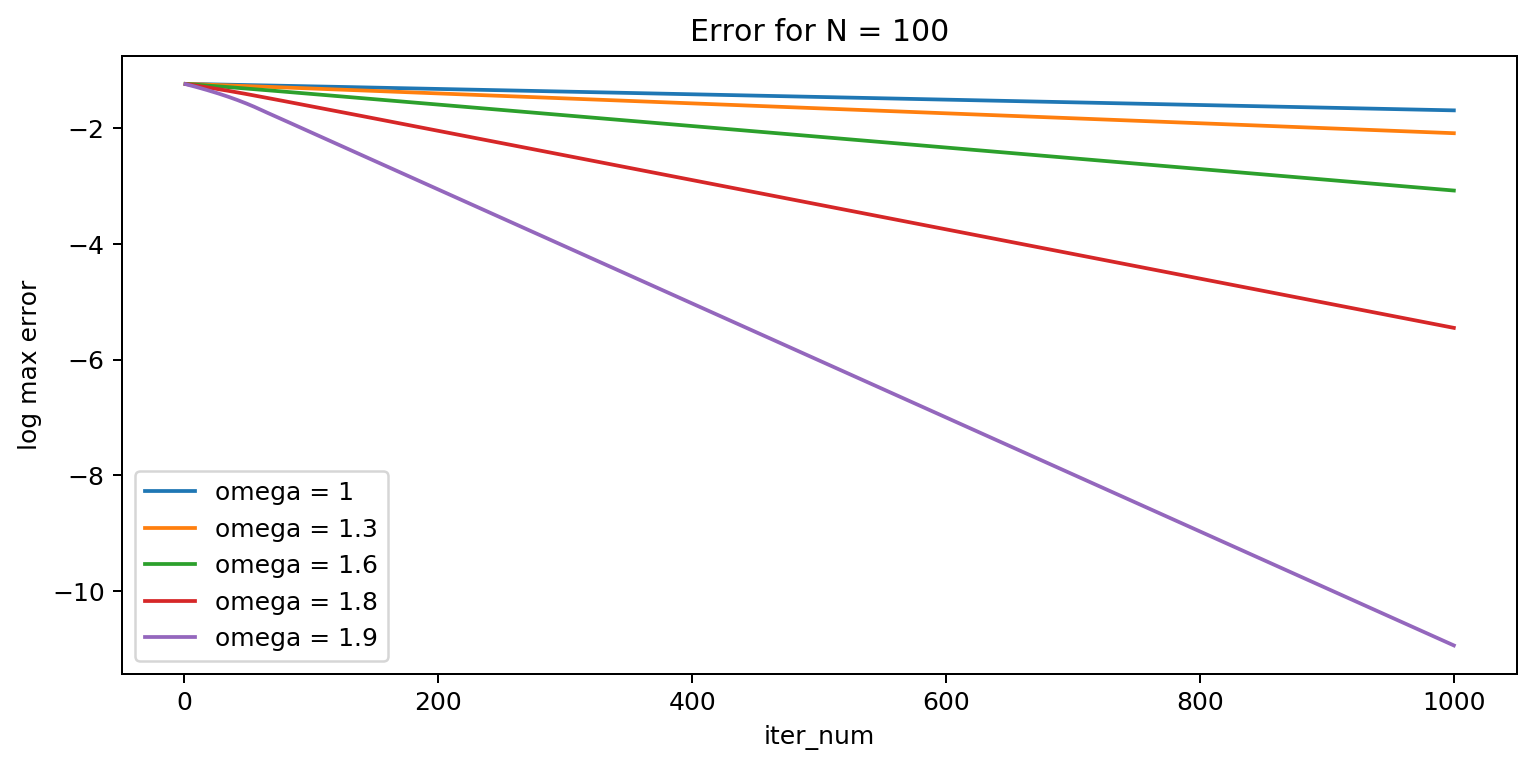

In [379]:
N = 100
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


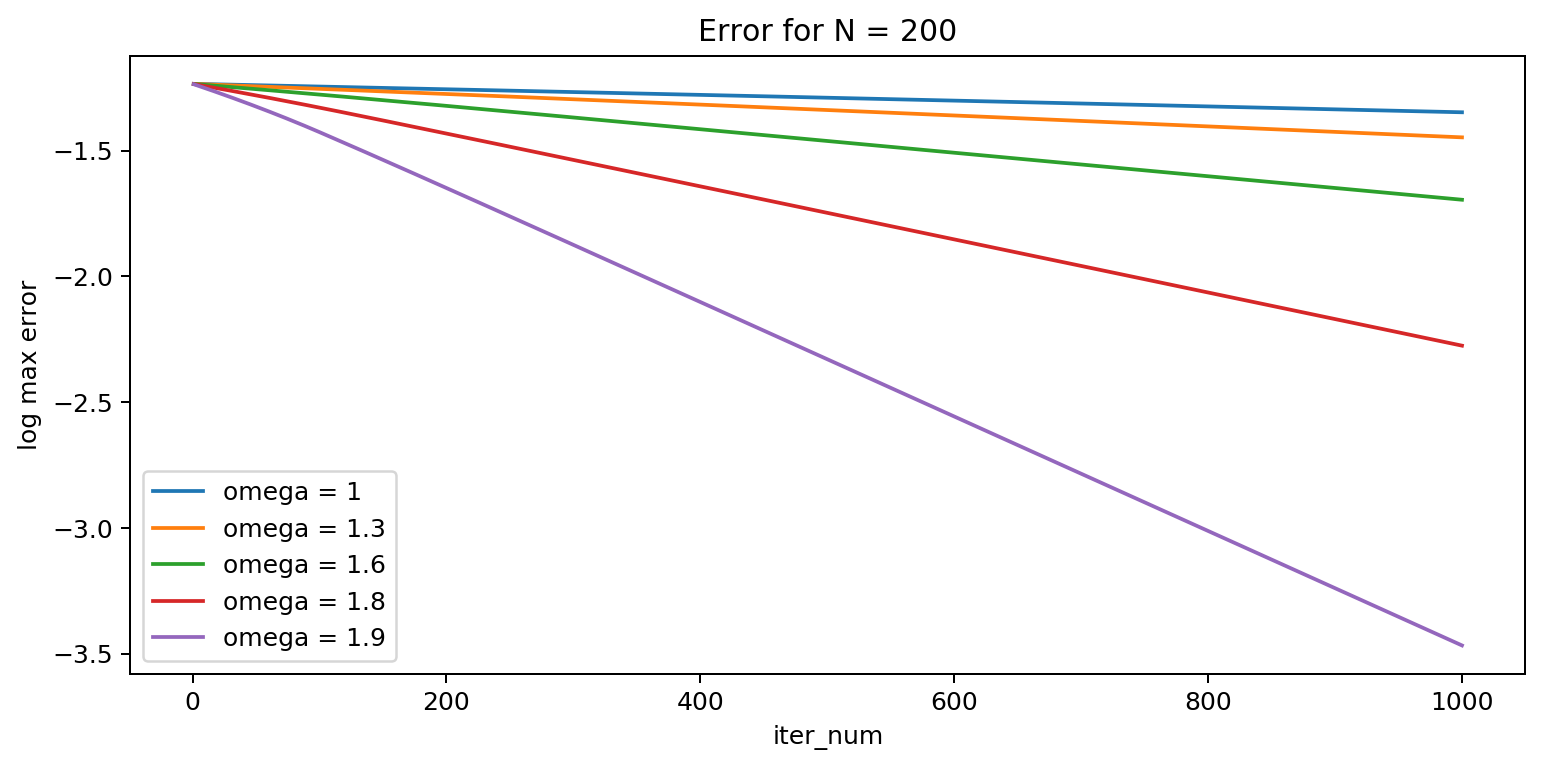

In [380]:
N = 200
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


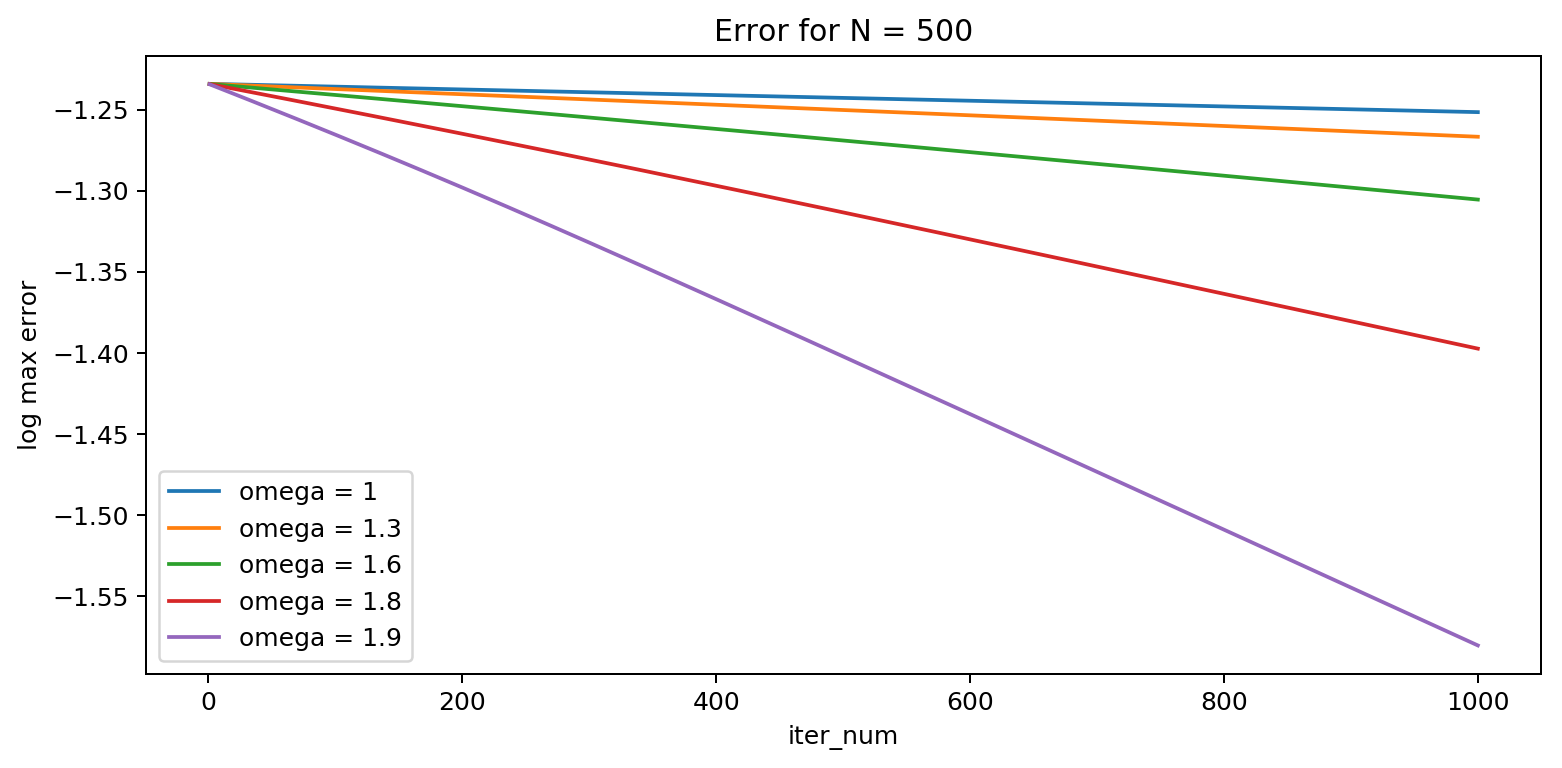

In [381]:
N = 500
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


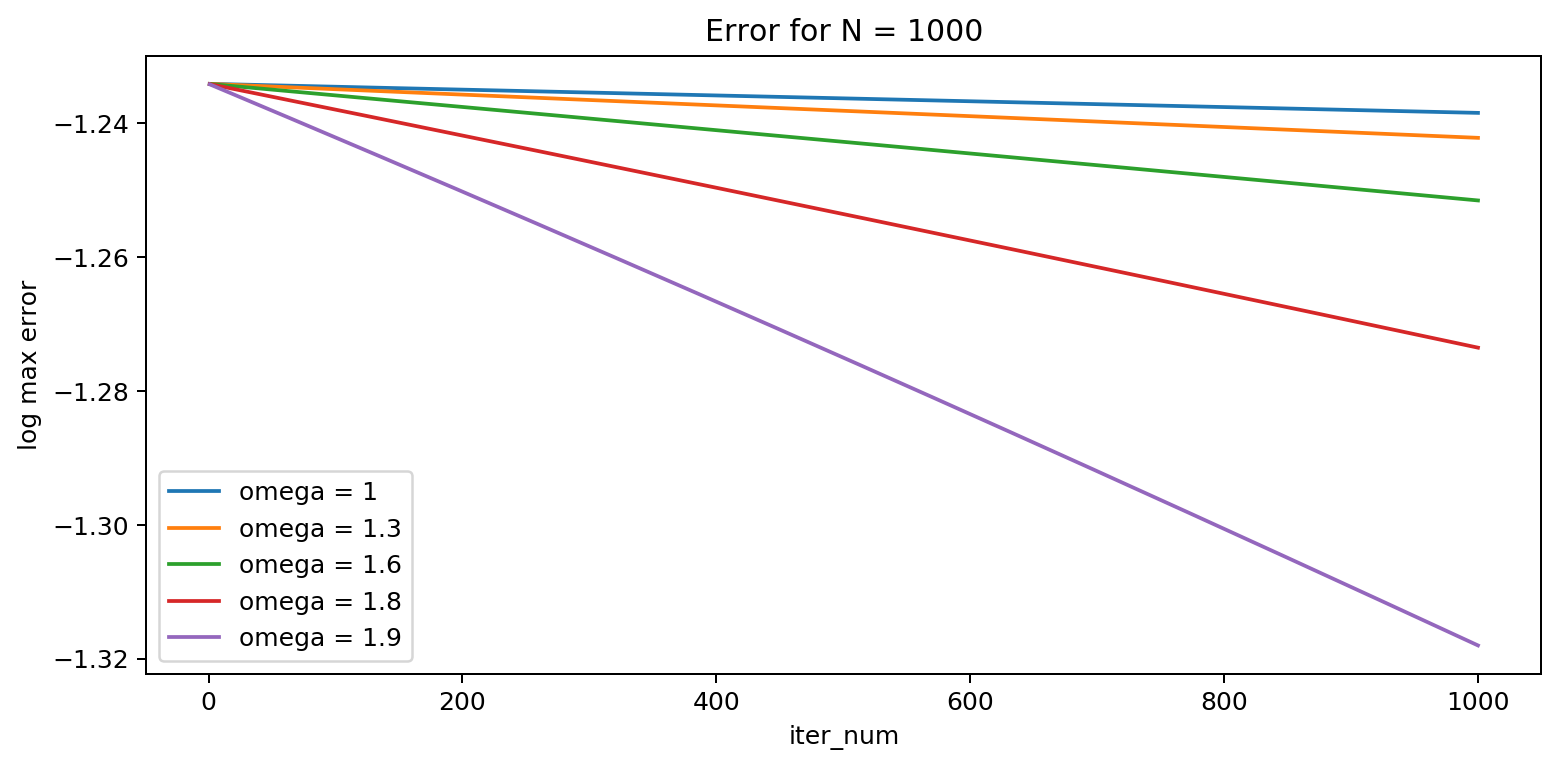

In [382]:
N = 1000
plt.figure(figsize=(10, 10), dpi=180)
for w in omegas:
    draw_error_from_iter(1000, tridiagonal_solver, N, w, log_y=True, log_x=False)
plt.legend(tuple(["omega = " + str(w) for w in omegas]))
plt.title("Error for N = " + str(N))
plt.show()

Как видим, чем больше N, то есть чем больше матрица, тем больше погрешность метода SOR, что логично. На матрицах $1000 * 1000$ погрешность уже довольно серьезная, порядка $10^{-1}$. В целом, как правило, омега равная 1.9 лучше всех, но при малых N это не всегда верно. В общем-то, как и ожидалось, очевидно, что с ростом итераций погрешность убывает. Убывает она как прямая, и так как масштаб по y $log$, то это значит, что сходимость экспоненциальная. 